In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('jakos_wody.csv')

In [4]:
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


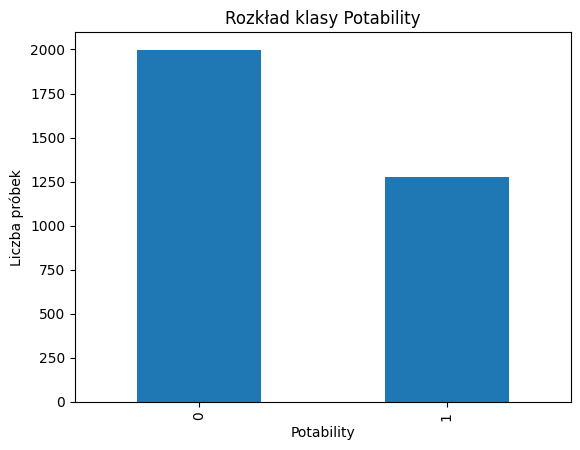

In [6]:
print(df.describe())

# Wizualizacja: rozkład cechy docelowej (Potability)
import matplotlib.pyplot as plt

df['Potability'].value_counts().plot(kind='bar')
plt.title('Rozkład klasy Potability')
plt.xlabel('Potability')
plt.ylabel('Liczba próbek')
plt.show()

In [7]:
import seaborn as sns

# Liczba braków danych
missing_values = df.isnull().sum()
print("Braki danych:\n", missing_values)


Braki danych:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


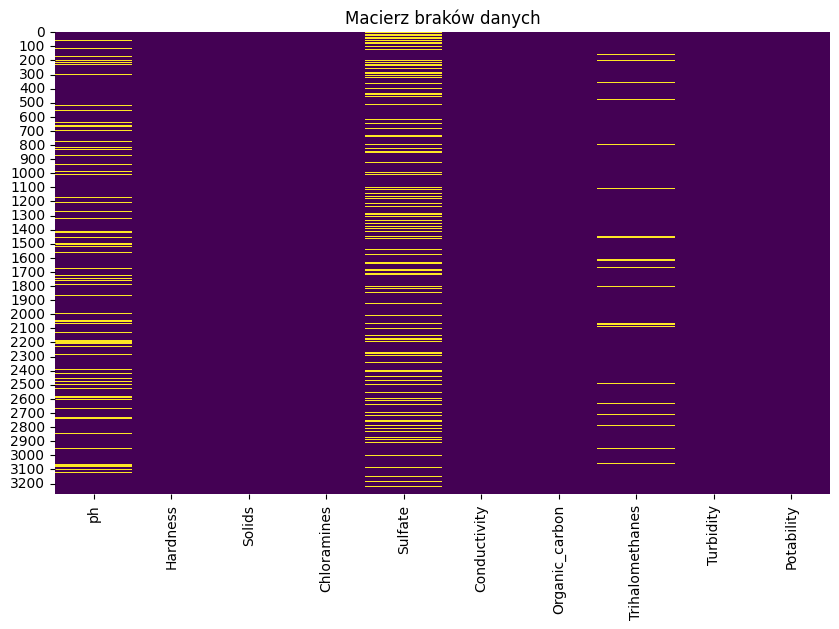

In [8]:
# Wizualizacja braków danych
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Macierz braków danych')
plt.show()

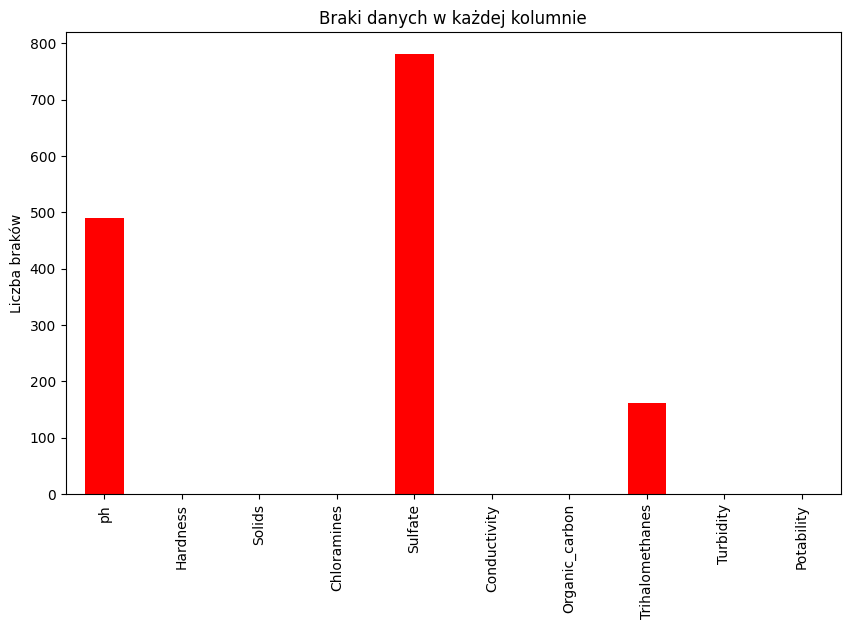

In [9]:
# Słupkowy wykres braków
missing_values.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Braki danych w każdej kolumnie')
plt.ylabel('Liczba braków')
plt.show()

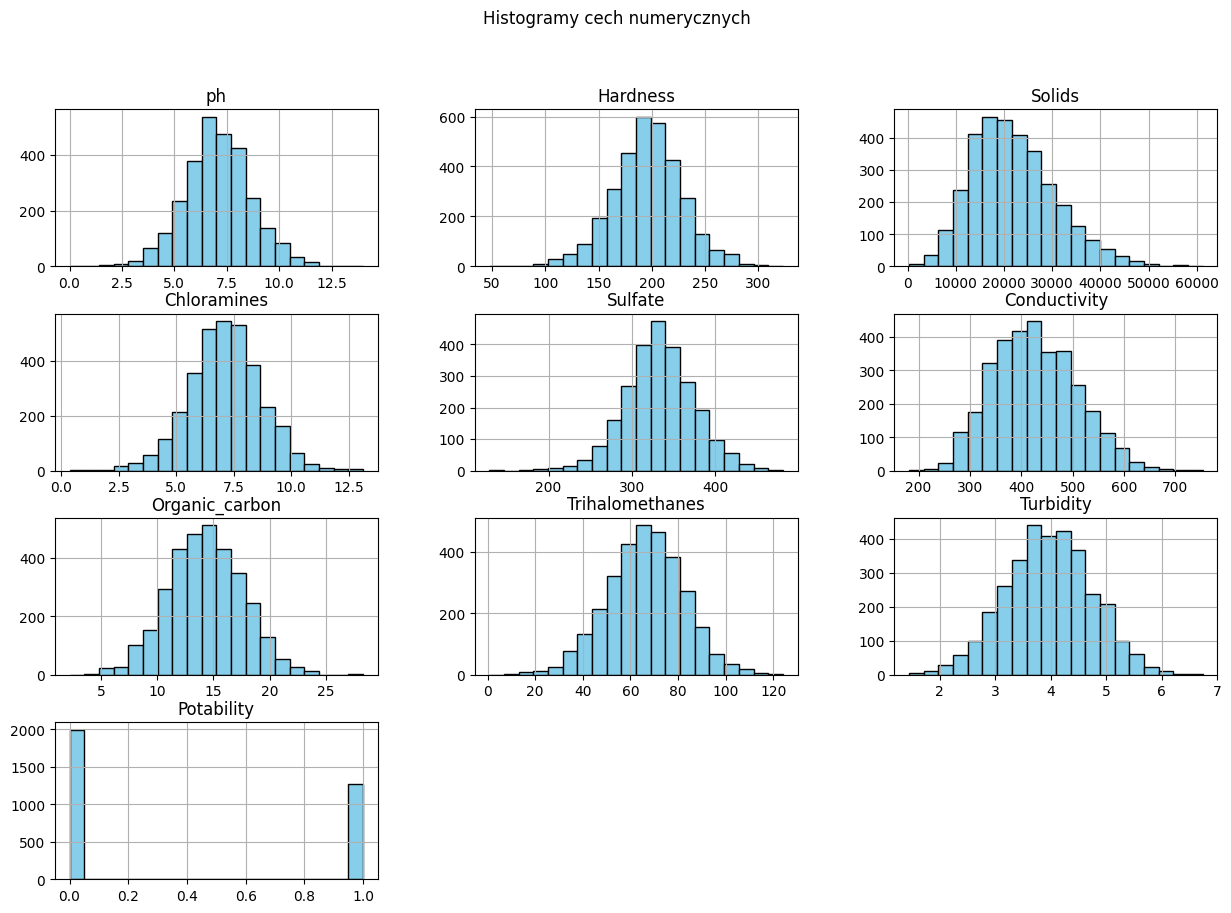

In [10]:
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogramy cech numerycznych')
plt.show()


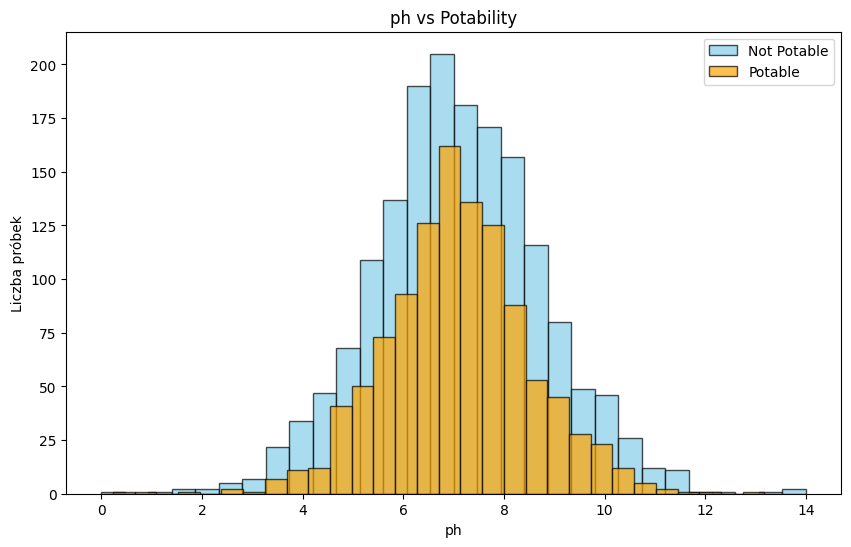

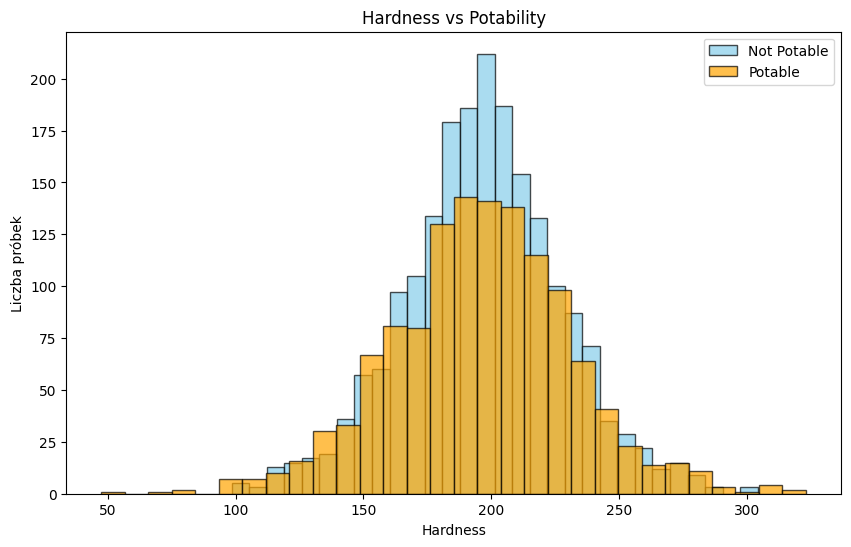

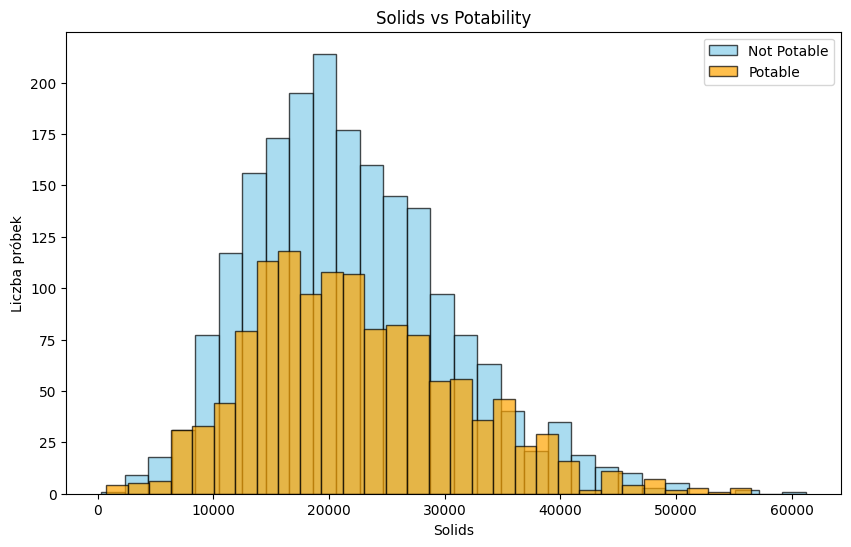

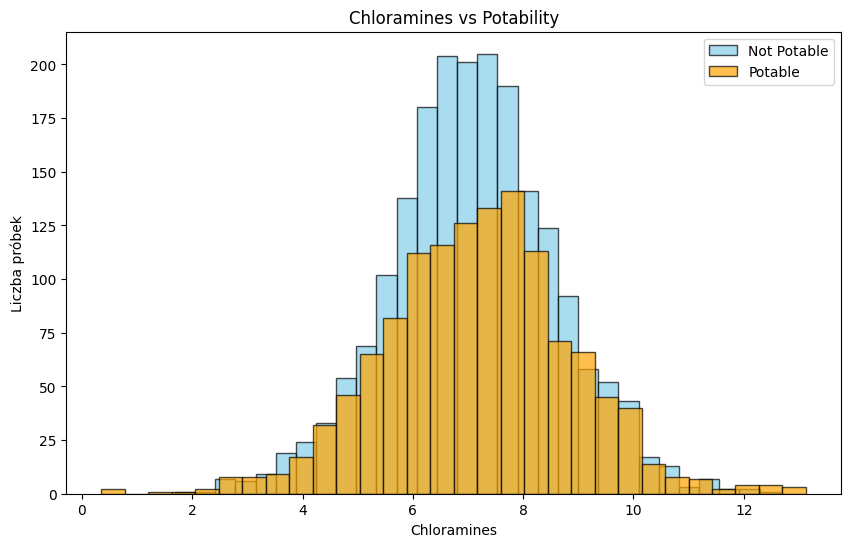

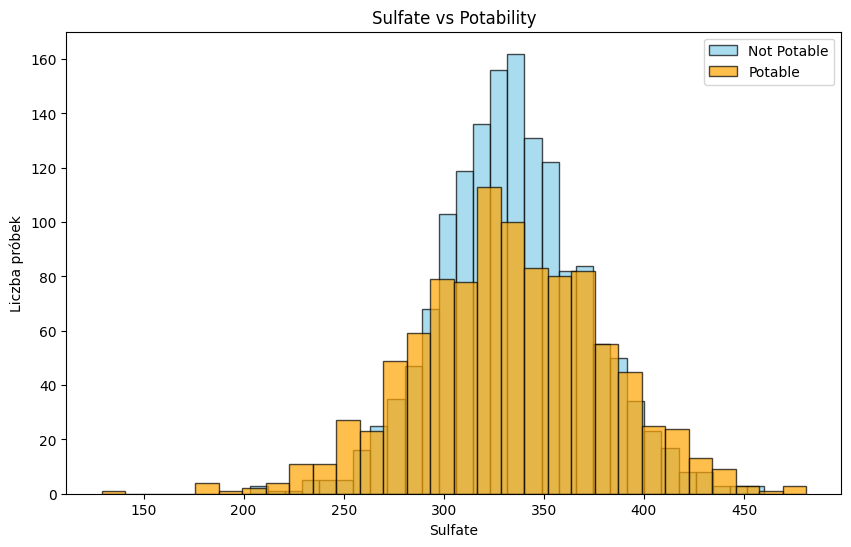

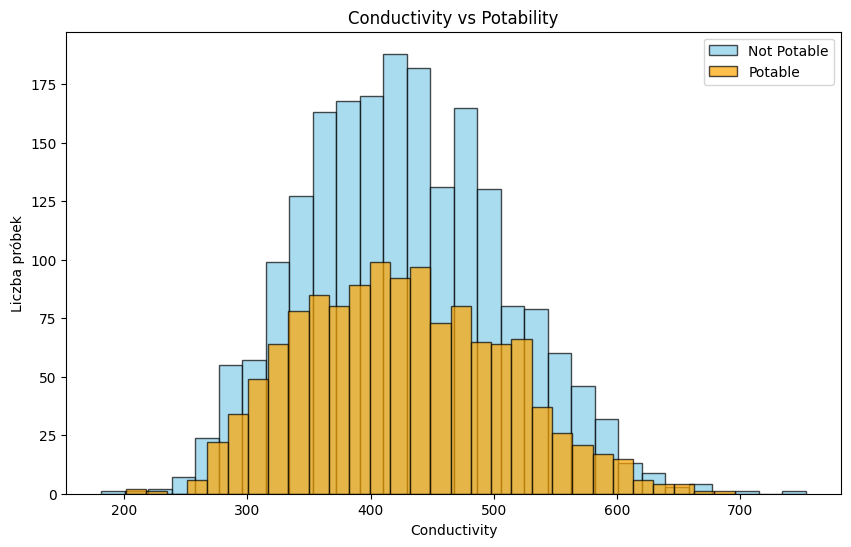

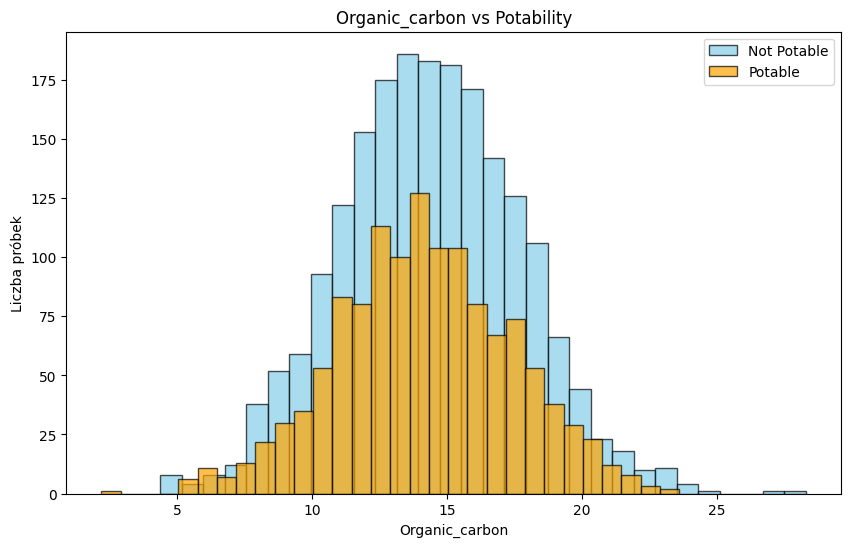

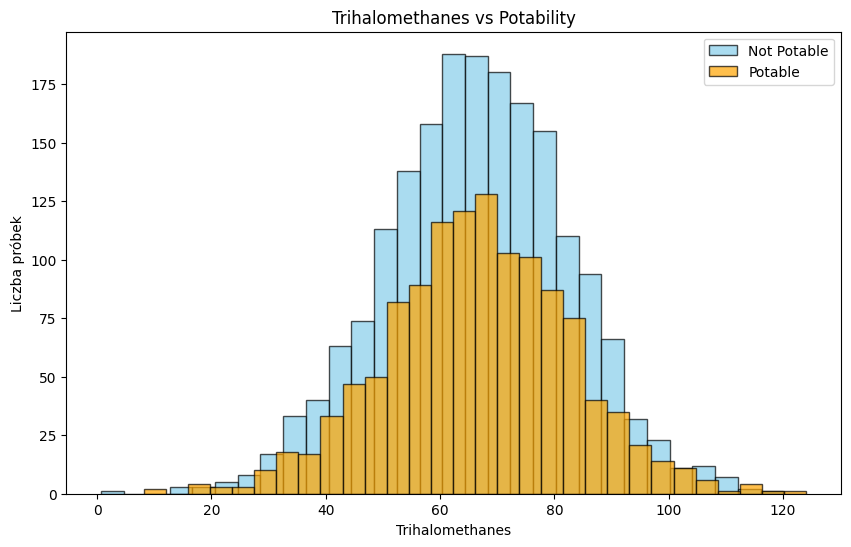

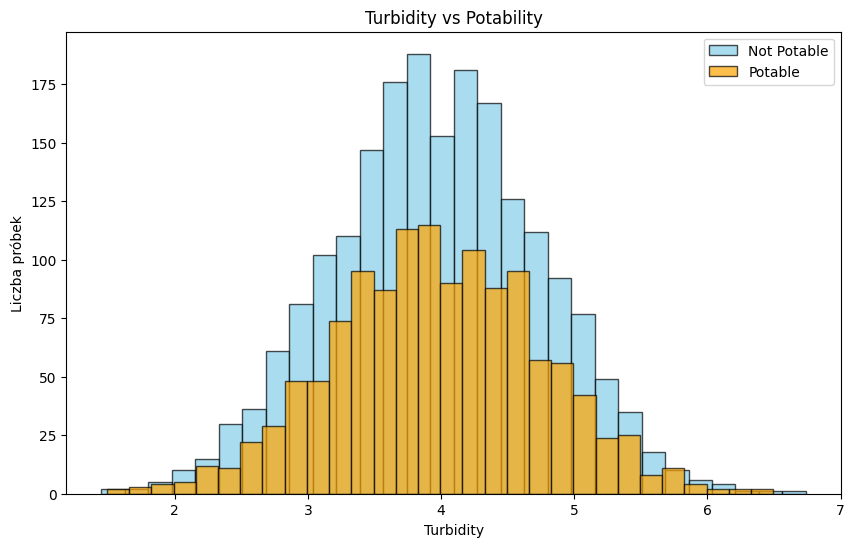

In [11]:
import matplotlib.pyplot as plt

# Lista kolumn bez Potability (bo to target)
features = df.columns.drop('Potability')

# Petla po wszystkich cechach
for col in features:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Dane dla klasy 0 (Not Potable)
    cl0 = df.loc[df["Potability"] == 0, col]
    # Dane dla klasy 1 (Potable)
    cl1 = df.loc[df["Potability"] == 1, col]
    
    # Histogramy
    ax.hist(cl0, bins=30, alpha=0.7, label='Not Potable', color='skyblue', edgecolor='black')
    ax.hist(cl1, bins=30, alpha=0.7, label='Potable', color='orange', edgecolor='black')
    
    # Tytuł i legenda
    ax.set_title(f'{col} vs Potability')
    ax.set_xlabel(col)
    ax.set_ylabel('Liczba próbek')
    ax.legend()
    
    plt.show()


In [12]:
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [13]:
X_mean = df.copy()
X_median = df.copy()
X_mf = df.copy()
X_iter = df.copy()

In [14]:
# Poprawiona imputacja - wymuszenie przypisania wartości
imputer_mean = SimpleImputer(strategy='mean')
X_mean.iloc[:, :-1] = imputer_mean.fit_transform(X_mean.iloc[:, :-1])

imputer_median = SimpleImputer(strategy='median')
X_median.iloc[:, :-1] = imputer_median.fit_transform(X_median.iloc[:, :-1])

imputer_mf = SimpleImputer(strategy='most_frequent')
X_mf.iloc[:, :-1] = imputer_mf.fit_transform(X_mf.iloc[:, :-1])


In [15]:
imputer_iter = IterativeImputer(random_state=42)
X_iter.iloc[:, :-1] = imputer_iter.fit_transform(X_iter.iloc[:, :-1])

In [16]:
# Sprawdzenie, czy są jeszcze braki danych po imputacji
print("Braki danych PO imputacji (Średnia):\n", X_mean.isnull().sum())
print("Braki danych PO imputacji (Mediana):\n", X_median.isnull().sum())
print("Braki danych PO imputacji (Najczęstsza wartość):\n", X_mf.isnull().sum())
print("Braki danych PO imputacji (IterativeImputer):\n", X_iter.isnull().sum())


Braki danych PO imputacji (Średnia):
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
Braki danych PO imputacji (Mediana):
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
Braki danych PO imputacji (Najczęstsza wartość):
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
Braki danych PO imputacji (IterativeImputer):
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalometh

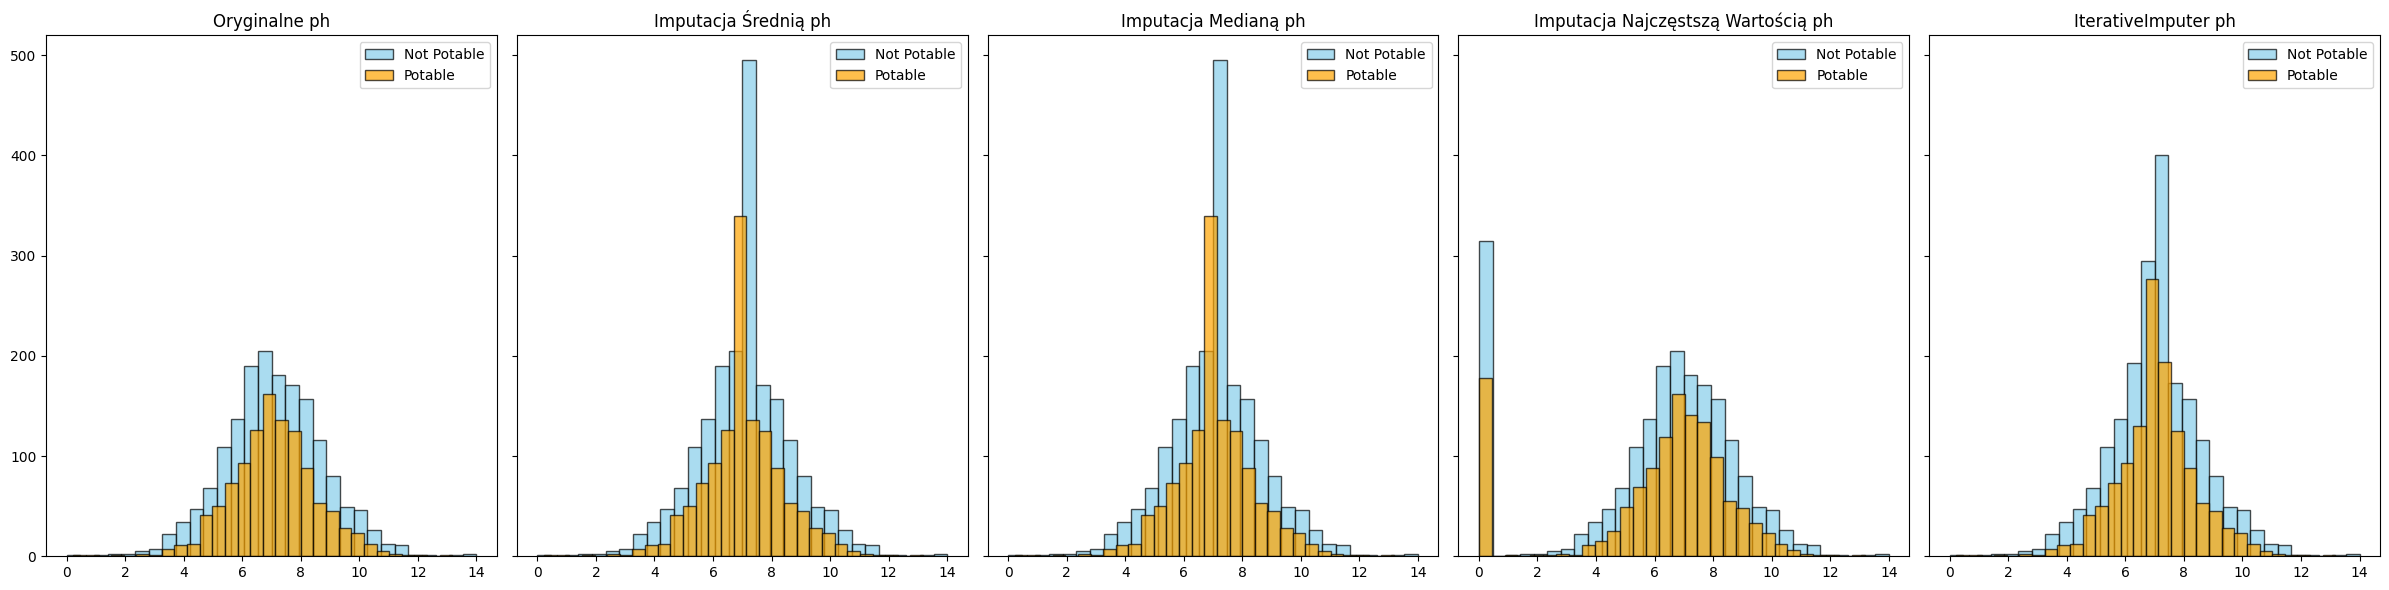

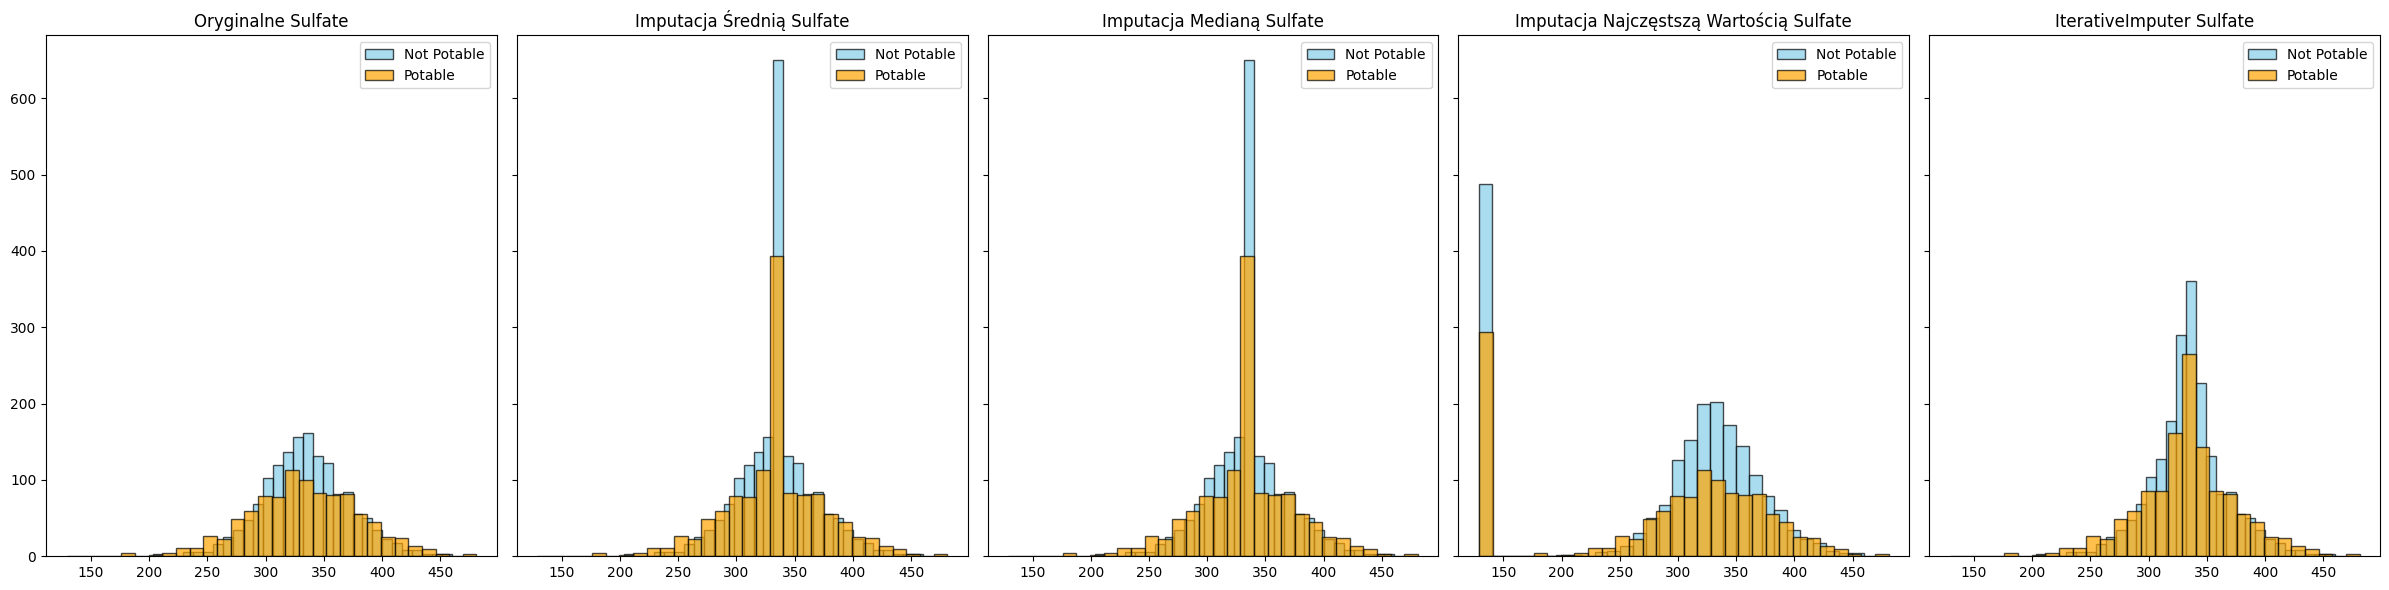

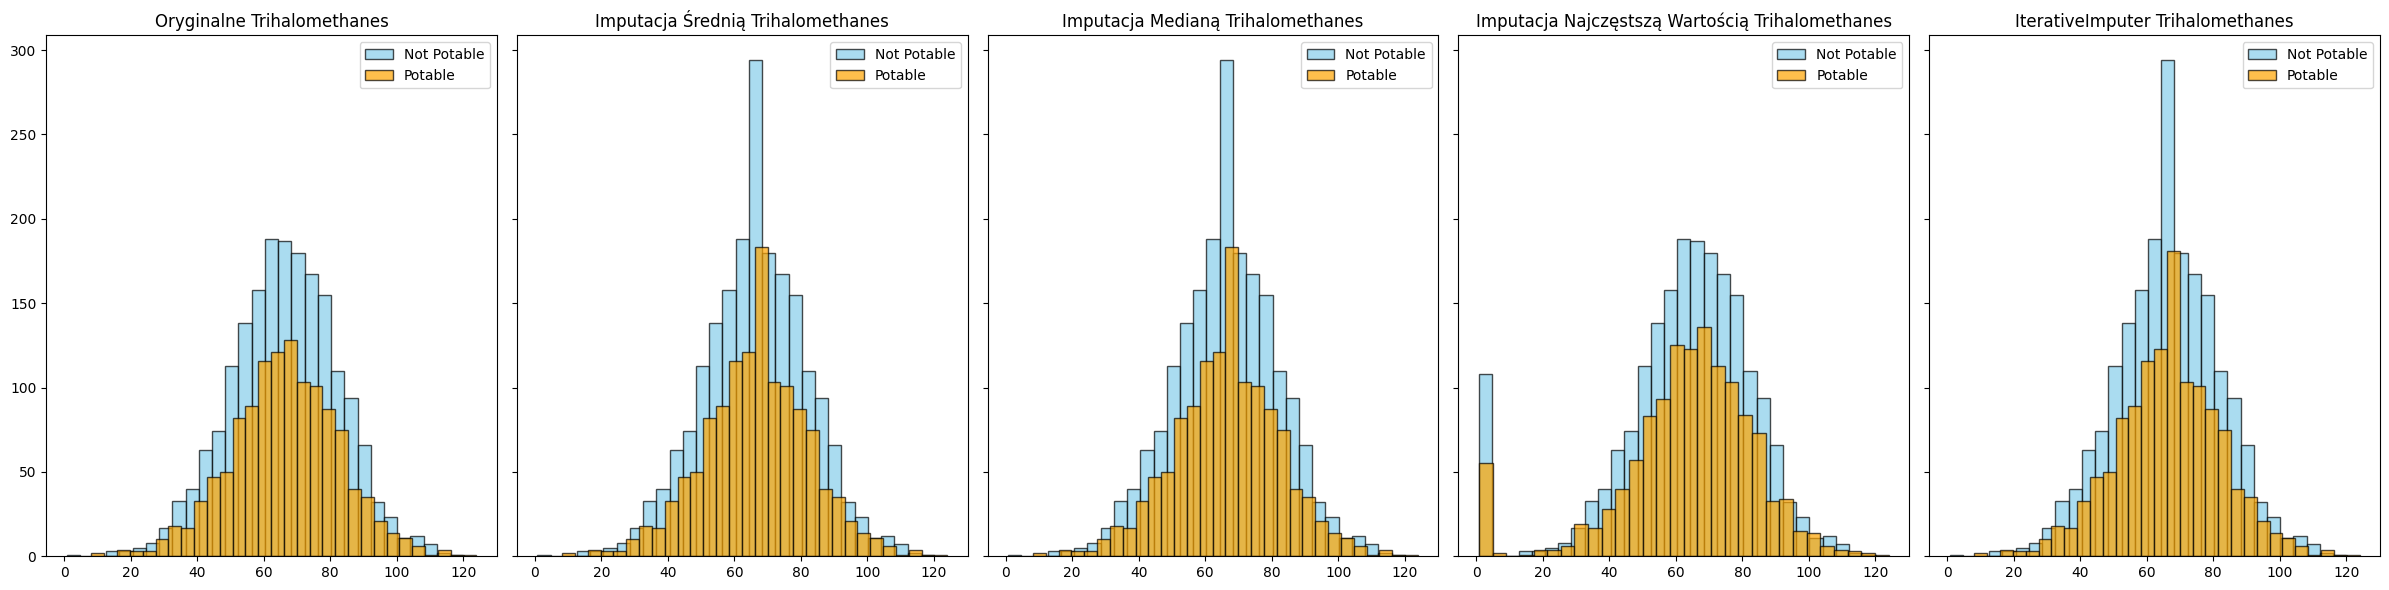

In [17]:
# Lista cech z brakami danych (według Twojego obrazka)
features_with_nan = ["ph", "Sulfate", "Trihalomethanes"]

# Tworzenie wykresów dla cech z brakami
for col in features_with_nan:
    fig, axes = plt.subplots(1, 5, figsize=(24, 6), sharex=True, sharey=True)

    # Oryginalne dane (z brakami)
    cl0 = df.loc[df["Potability"] == 0, col].dropna()
    cl1 = df.loc[df["Potability"] == 1, col].dropna()
    axes[0].hist(cl0, bins=30, alpha=0.7, label='Not Potable', color='skyblue', edgecolor='black')
    axes[0].hist(cl1, bins=30, alpha=0.7, label='Potable', color='orange', edgecolor='black')
    axes[0].set_title(f'Oryginalne {col}')
    axes[0].legend()

    # Imputacja Średnią
    cl0 = X_mean.loc[df["Potability"] == 0, col]
    cl1 = X_mean.loc[df["Potability"] == 1, col]
    axes[1].hist(cl0, bins=30, alpha=0.7, label='Not Potable', color='skyblue', edgecolor='black')
    axes[1].hist(cl1, bins=30, alpha=0.7, label='Potable', color='orange', edgecolor='black')
    axes[1].set_title(f'Imputacja Średnią {col}')
    axes[1].legend()

    # Imputacja Medianą
    cl0 = X_median.loc[df["Potability"] == 0, col]
    cl1 = X_median.loc[df["Potability"] == 1, col]
    axes[2].hist(cl0, bins=30, alpha=0.7, label='Not Potable', color='skyblue', edgecolor='black')
    axes[2].hist(cl1, bins=30, alpha=0.7, label='Potable', color='orange', edgecolor='black')
    axes[2].set_title(f'Imputacja Medianą {col}')
    axes[2].legend()

    # Imputacja Medianą
    cl0 = X_mf.loc[df["Potability"] == 0, col]
    cl1 = X_mf.loc[df["Potability"] == 1, col]
    axes[3].hist(cl0, bins=30, alpha=0.7, label='Not Potable', color='skyblue', edgecolor='black')
    axes[3].hist(cl1, bins=30, alpha=0.7, label='Potable', color='orange', edgecolor='black')
    axes[3].set_title(f'Imputacja Najczęstszą Wartością {col}')
    axes[3].legend()

    # Imputacja IterativeImputer
    cl0 = X_iter.loc[df["Potability"] == 0, col]
    cl1 = X_iter.loc[df["Potability"] == 1, col]
    axes[4].hist(cl0, bins=30, alpha=0.7, label='Not Potable', color='skyblue', edgecolor='black')
    axes[4].hist(cl1, bins=30, alpha=0.7, label='Potable', color='orange', edgecolor='black')
    axes[4].set_title(f'IterativeImputer {col}')
    axes[4].legend()

    plt.tight_layout()
    plt.show()

In [20]:
print("Liczba próbek w zbiorze treningowym:")
#print(y_train.value_counts())
print("\nLiczba próbek w zbiorze testowym:")
#print(y_test.value_counts())


Liczba próbek w zbiorze treningowym:

Liczba próbek w zbiorze testowym:


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y = df['Potability']  # Cel klasyfikacji

# Podział danych na treningowe/testowe (dla każdej metody imputacji)
X_train_mean, X_test_mean, y_train, y_test = train_test_split(X_mean, y, test_size=0.3, random_state=42)
X_train_median, X_test_median, _, _ = train_test_split(X_median, y, test_size=0.3, random_state=42)
X_train_iter, X_test_iter, _, _ = train_test_split(X_iter, y, test_size=0.3, random_state=42)

# Lista modeli do testów
models = {
    "RandomForest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    "SVM": SVC(kernel='rbf', class_weight='balanced', C=1, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Testowanie modeli dla różnych metod imputacji
results = []

for name, model in models.items():
    for method, X_train, X_test in [("Mean", X_train_mean, X_test_mean), 
                                    ("Median", X_train_median, X_test_median),
                                    ("Iterative", X_train_iter, X_test_iter)]:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Obliczanie metryk
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Dodawanie wyników do listy
        results.append([name, method, accuracy, precision, recall, f1])

# Tworzenie tabeli wyników
results_df = pd.DataFrame(results, columns=["Model", "Imputacja", "Accuracy", "Precision", "Recall", "F1-score"])

# Wyświetlenie wyników
print(results_df)



          Model  Imputacja  Accuracy  Precision    Recall  F1-score
0  RandomForest       Mean  1.000000   1.000000  1.000000  1.000000
1  RandomForest     Median  1.000000   1.000000  1.000000  1.000000
2  RandomForest  Iterative  1.000000   1.000000  1.000000  1.000000
3           SVM       Mean  0.619532   0.473333  0.193989  0.275194
4           SVM     Median  0.620549   0.476510  0.193989  0.275728
5           SVM  Iterative  0.619532   0.473333  0.193989  0.275194
6           KNN       Mean  0.548321   0.371711  0.308743  0.337313
7           KNN     Median  0.548321   0.371711  0.308743  0.337313
8           KNN  Iterative  0.548321   0.373377  0.314208  0.341246


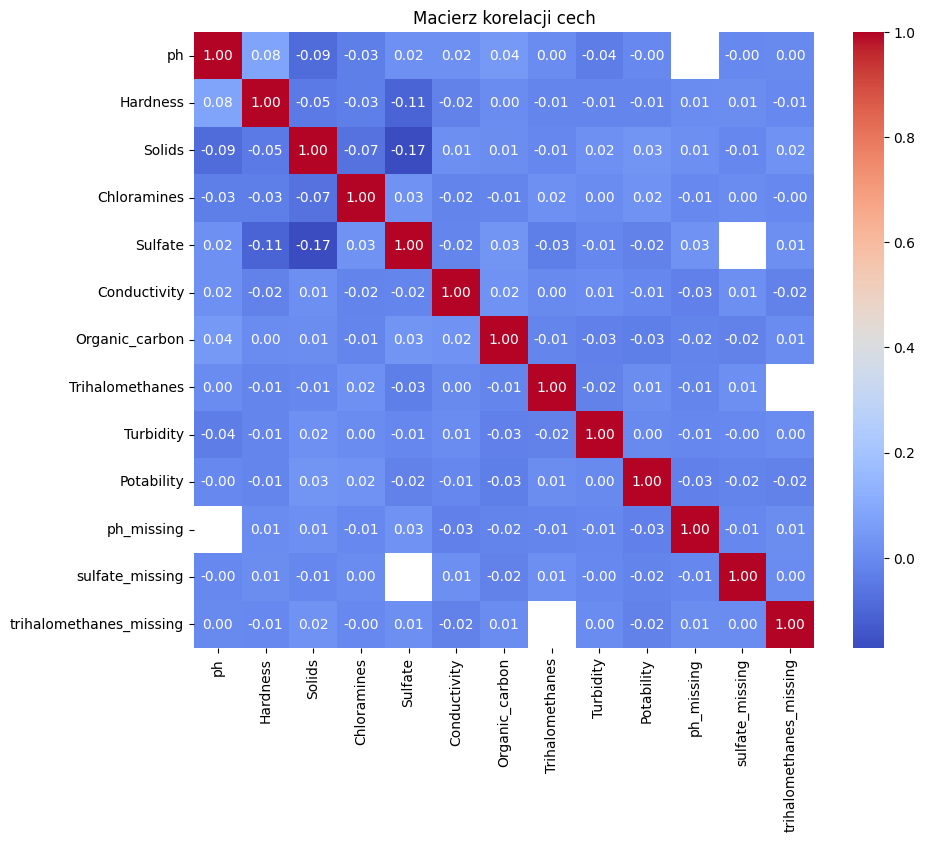

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji cech")
plt.show()


In [ ]:
# Tworzenie flag brakujących wartości
df["ph_missing"] = df["ph"].isna().astype(int)
df["sulfate_missing"] = df["Sulfate"].isna().astype(int)
df["trihalomethanes_missing"] = df["Trihalomethanes"].isna().astype(int)


print(df.groupby("Potability")["ph_missing"].mean())
print(df.groupby("Potability")["sulfate_missing"].mean())
print(df.groupby("Potability")["trihalomethanes_missing"].mean())


Potability
0    0.157157
1    0.138498
Name: ph_missing, dtype: float64
Potability
0    0.244244
1    0.229264
Name: sulfate_missing, dtype: float64
Potability
0    0.053554
1    0.043036
Name: trihalomethanes_missing, dtype: float64


In [19]:
# Tworzymy nową kolumnę dla zmodyfikowanej potability
df["Potability_WHO"] = df["Potability"]  # Kopia oryginalnych wartości

# Ustawiamy Potability = 0 dla próbek spoza norm WHO
df.loc[(df["ph"] < 6.5) | (df["ph"] > 8.5), "Potability_WHO"] = 0
df.loc[df["Solids"] > 1000, "Potability_WHO"] = 0
df.loc[df["Chloramines"] > 4, "Potability_WHO"] = 0
df.loc[df["Conductivity"] > 400, "Potability_WHO"] = 0
df.loc[df["Organic_carbon"] > 4, "Potability_WHO"] = 0
df.loc[df["Trihalomethanes"] > 80, "Potability_WHO"] = 0
df.loc[df["Turbidity"] > 5, "Potability_WHO"] = 0

# Sprawdźmy, ile próbek się zmieniło
print("Liczba zmodyfikowanych wartości Potability:", (df["Potability_WHO"] != df["Potability"]).sum())

# Sprawdzenie nowego rozkładu Potability
df["Potability_WHO"].value_counts()


Liczba zmodyfikowanych wartości Potability: 1278


Potability_WHO
0    3276
Name: count, dtype: int64